In [1]:
import sys
import ee
sys.path.insert(0,'apGIS-0.4.0/')
from apgis import *
from apgis.gisgeodf import *
from apgis.gisraster import *
from apgis.geespatial import *
import contextily as ctx
from apgis.apresource import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

In [2]:
eeInitialize(internalConfig=True)

Import GeoJSON and Products

In [3]:
aoijson =  apjsonio.geojsonRead("W:\\antpod\\alpha\\resource\\geojson\\FarmKanchi.geojson")
aoi = ee.Geometry.Polygon(aoijson["features"][0]["geometry"]["coordinates"][0])
s2 = ee.ImageCollection("COPERNICUS/S2_SR").filterDate("2020-03-01", "2020-08-31").filterBounds(aoi)

rq = RequestList(["NDVI", "NDWI"], "L2A")

res = Resource(remotefile="karayambedu1_L.geojson")

Export ImageCollection

In [ ]:
# from apgis.geeexport import Export
# tasks = Export.ImageCollection.toDrive(imageCol=s2, requestList=rq, field=res.field, folder="Batch Export")

# for task in tasks:
#     for t in task:
#         t.start()

Read

In [4]:
geo10 = apjsonio.geojsonRead("acre10.geojson")
geo20 = apjsonio.geojsonRead("acre20.geojson")

geo10 = ee.Geometry.Polygon(geo10["features"][0]["geometry"]["coordinates"])
geo20 = ee.Geometry.Polygon(geo20["features"][0]["geometry"]["coordinates"])

In [5]:
area10 = geespatial.getArea(geo10, "ACRE")
area10

8.545

In [6]:
area20 = geespatial.getArea(geo20, "ACRE")
area20

16.773

In [7]:
acre10 = makeGridDF("acre10.geojson", "epsg:3857")
acre20 = makeGridDF("acre20.geojson", "epsg:3857")

Last Week- Acre 10

In [8]:
r1 = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDVI-2020-08-23.tif")
r2 = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDVI-2020-08-28.tif")

r3 = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDWI-2020-08-23.tif")
r4 = Raster("W:\\antpod\\testprk\\Batch Export\\AP-demo000-fb8459fb51896de9bb2c1a4c8b44566d-104-L2A-NDWI-2020-08-28.tif")

In [9]:
aug23ndvi = r1.assignMean(acre10)
aug28ndvi = r2.assignMean(acre10)
aug23ndwi = r3.assignMean(acre10)
aug28ndwi = r4.assignMean(acre10)

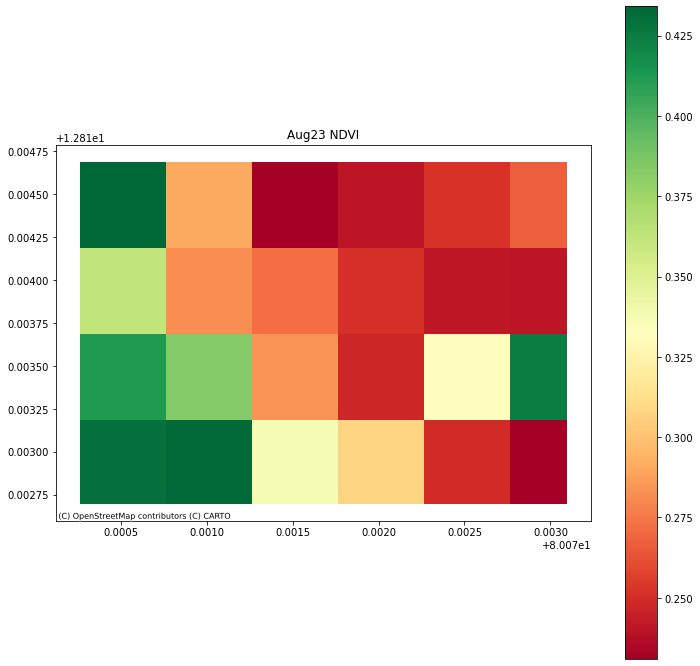

In [32]:
ax = aug23ndvi.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn', legend = True)
plt.title('Aug23 NDVI')
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

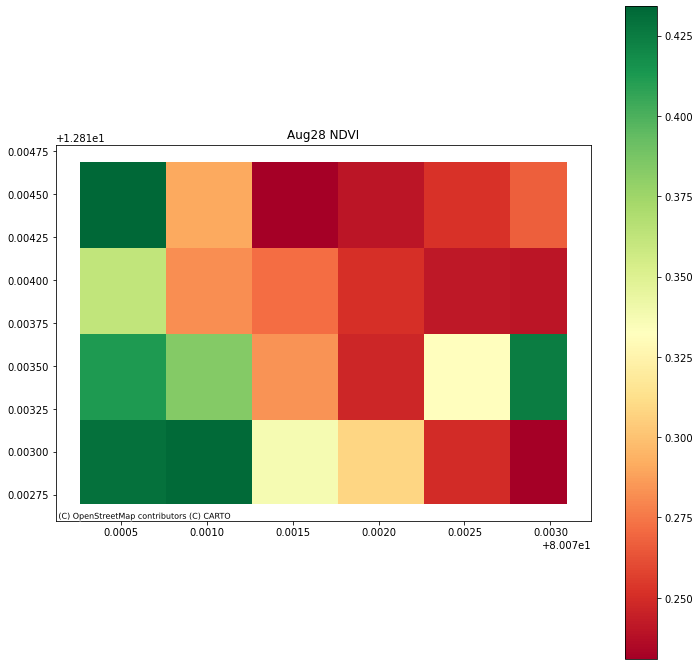

In [33]:
ax = aug28ndvi.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
plt.title('Aug28 NDVI')
# aug28.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

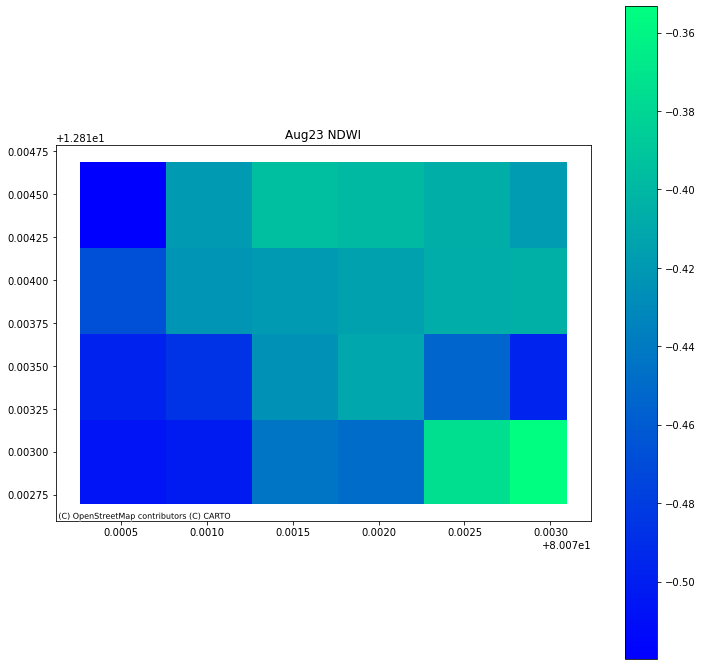

In [34]:
ax = aug23ndwi.plot('meanNDWI', figsize = (12,12), cmap = 'winter', legend = True)
plt.title('Aug23 NDWI')
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

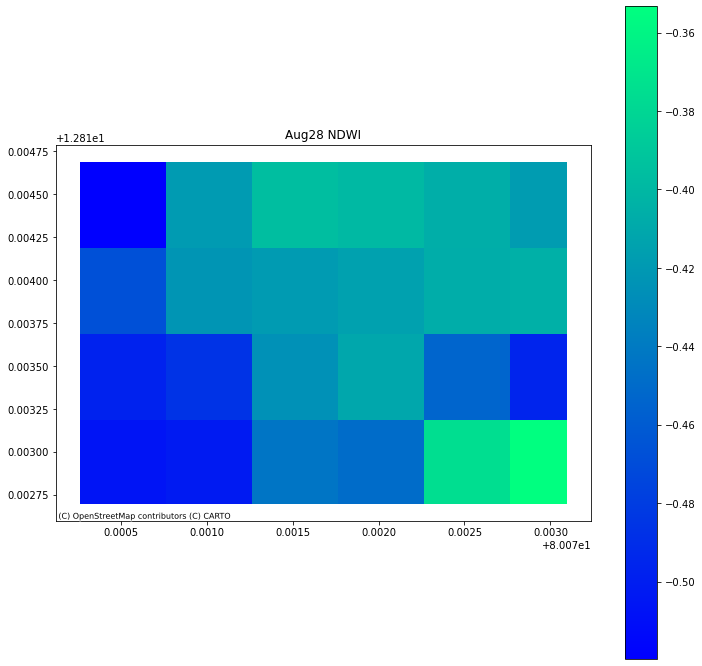

In [35]:
ax= aug28ndwi.plot('meanNDWI', figsize = (12,12), cmap = 'winter',  legend = True)
plt.title('Aug28 NDWI')
# aug28.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

Last Week- Acre 20

In [13]:
aug23ndvi = r1.assignMean(acre20)
aug28ndvi = r2.assignMean(acre20)
aug23ndwi = r3.assignMean(acre20)
aug28ndwi = r4.assignMean(acre20)

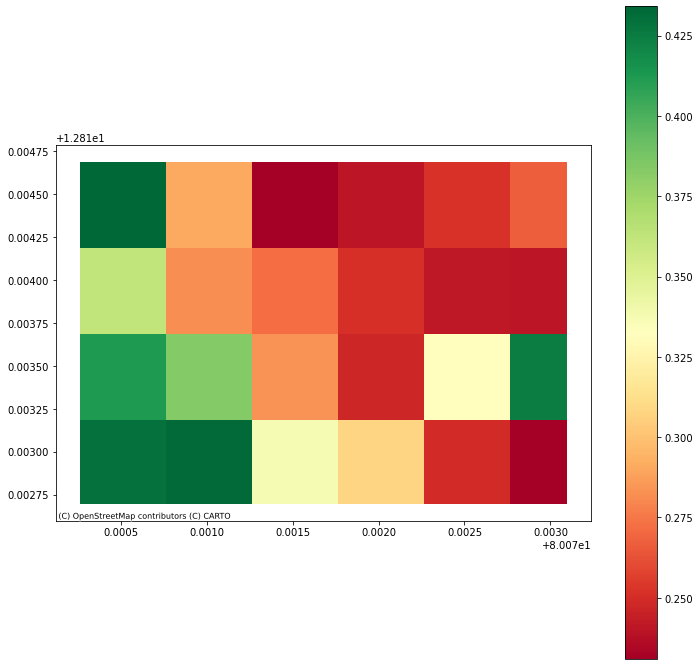

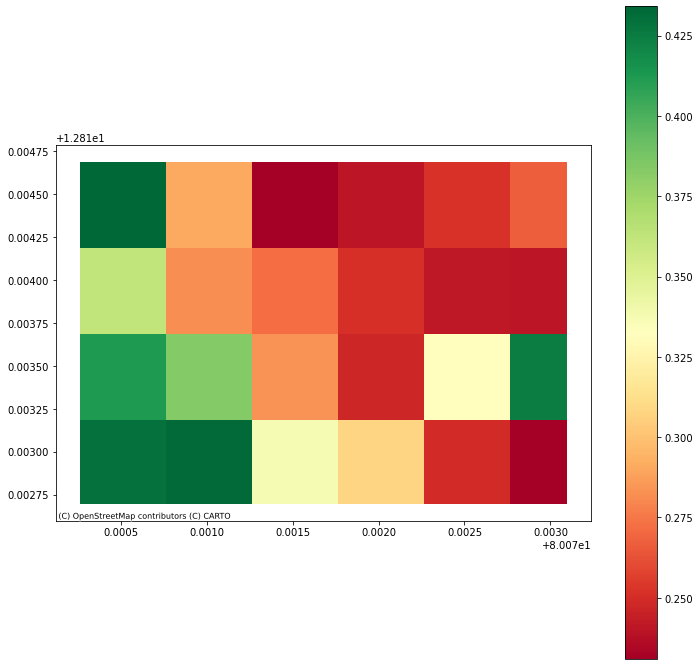

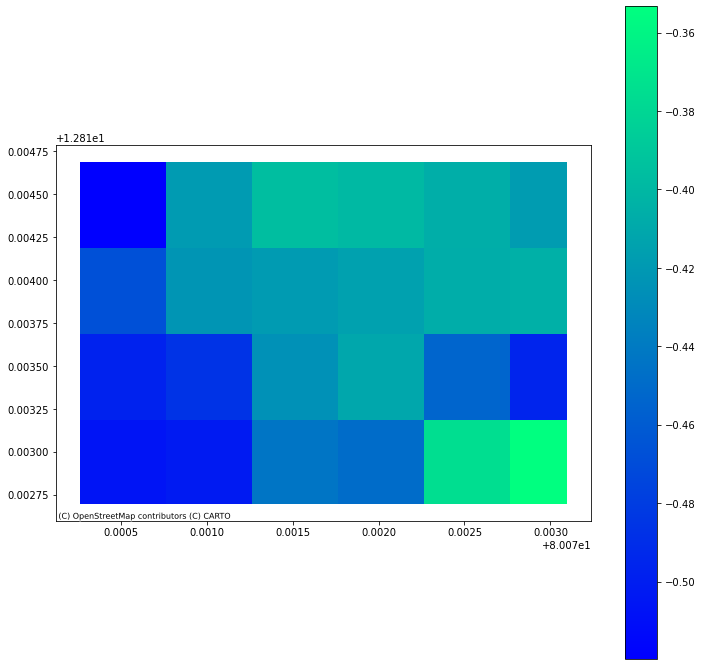

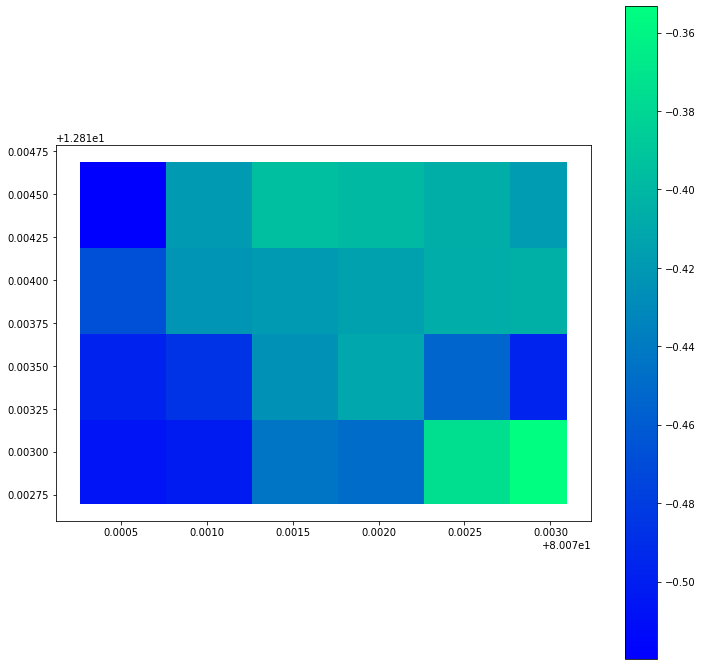

In [14]:
ax = aug23ndvi.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn', legend = True)
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

ax= aug28ndvi.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
# aug28.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

ax = aug23ndwi.plot('meanNDWI', figsize = (12,12), cmap = 'winter', legend = True)
# aug23.boundary.plot(ax=plt.gca(),color='k')
ctx.add_basemap(ax=ax, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager, zoom=2)

ax= aug28ndwi.plot('meanNDWI', figsize = (12,12), cmap = 'winter',  legend = True)
# aug28.boundary.plot(ax=plt.gca(),color='k')